# Клиенты авиакомпании

Датасет содержит информацию о клиентах некоторой авиакомпании

## Импорт библиотек, константы

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
RANDOM_STATE = 42

In [3]:
DATASET_PATH = "https://raw.githubusercontent.com/evgpat/edu_stepik_from_idea_to_mvp/main/datasets/clients.csv"

## Загрузка и обзор данных

### Загрузка

In [4]:
# загрузка данных
df = pd.read_csv(DATASET_PATH)

### Описание данных

**Целевая переменная**
- `satisfaction`: удовлетворенность клиента полетом, бинарная (*satisfied* или *neutral or dissatisfied*)

**Признаки**
- `Gender` (categorical: _Male_ или _Female_): пол клиента
- `Age` (numeric, int): количество полных лет
- `Customer Type` (categorical: _Loyal Customer_ или _disloyal Customer_): лоялен ли клиент авиакомпании?
- `Type of Travel` (categorical: _Business travel_ или _Personal Travel_): тип поездки
- `Class` (categorical: _Business_ или _Eco_, или _Eco Plus_): класс обслуживания в самолете
- `Flight Distance` (numeric, int): дальность перелета (в милях)
- `Departure Delay in Minutes` (numeric, int): задержка отправления (неотрицательная)
- `Arrival Delay in Minutes` (numeric, int): задержка прибытия (неотрицательная)
- `Inflight wifi service` (categorical, int): оценка клиентом интернета на борту
- `Departure/Arrival time convenient` (categorical, int): оценка клиентом удобство времени прилета и вылета
- `Ease of Online booking` (categorical, int): оценка клиентом удобства онлайн-бронирования
- `Gate location` (categorical, int): оценка клиентом расположения выхода на посадку в аэропорту
- `Food and drink` (categorical, int): оценка клиентом еды и напитков на борту
- `Online boarding` (categorical, int): оценка клиентом выбора места в самолете
- `Seat comfort` (categorical, int): оценка клиентом удобства сиденья
- `Inflight entertainment` (categorical, int): оценка клиентом развлечений на борту
- `On-board service` (categorical, int): оценка клиентом обслуживания на борту
- `Leg room service` (categorical, int): оценка клиентом места в ногах на борту
- `Baggage handling` (categorical, int): оценка клиентом обращения с багажом
- `Checkin service` (categorical, int): оценка клиентом регистрации на рейс
- `Inflight service` (categorical, int): оценка клиентом обслуживания на борту
- `Cleanliness` (categorical, int): оценка клиентом чистоты на борту

In [5]:
# информация от столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129549 non-null  object 
 2   Age                                129564 non-null  float64
 3   Customer Type                      129803 non-null  object 
 4   Type of Travel                     129779 non-null  object 
 5   Class                              129764 non-null  object 
 6   Flight Distance                    129786 non-null  float64
 7   Departure Delay in Minutes         129773 non-null  float64
 8   Arrival Delay in Minutes           129371 non-null  float64
 9   Inflight wifi service              129835 non-null  float64
 10  Departure/Arrival time convenient  129831 non-null  float64
 11  Ease of Online booking             1298

In [6]:
# случайные три записи из датасета
df.sample(3)

,id,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
47889,47890,Female,37.0,Loyal Customer,Business travel,Eco,550.0,0.0,0.0,5.0,...,5.0,5.0,5.0,4.0,5.0,4.0,3.0,5.0,5.0,-
128179,128180,Female,18.0,Loyal Customer,Personal Travel,Eco,1972.0,0.0,0.0,3.0,...,3.0,3.0,3.0,3.0,4.0,3.0,3.0,4.0,3.0,-
93809,93810,Female,46.0,disloyal Customer,Business travel,Business,391.0,3.0,0.0,4.0,...,4.0,5.0,5.0,5.0,3.0,20.0,5.0,4.0,5.0,satisfied


###Анализ датасета и предобработка

In [7]:
# Посмотрим статистики численных данных в датасете
df.describe()

,id,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,129880.000000,129564.000000,129786.000000,129773.000000,129371.000000,129835.000000,129831.000000,129837.000000,129842.000000,129830.000000,129834.000000,129832.000000,129833.000000,129836.000000,129834.000000,129832.000000,129838.000000,129817.00000,129843.000000
mean,64940.500000,40.113951,1323.385804,15.811301,16.651406,2.732183,3.061857,2.760523,2.981424,3.208349,3.256674,3.445691,3.361395,3.387181,3.356101,3.636107,3.310056,3.64718,3.289865
std,37493.270818,20.365190,4516.191530,93.206139,109.167328,1.359786,1.559323,1.430800,1.312628,1.357649,1.381889,1.349732,1.366866,1.335540,1.361633,1.221818,1.298626,1.21837,1.347625
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.00000,2.000000
50%,64940.500000,40.000000,846.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.00000,3.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.00000,4.000000
max,129880.000000,621.000000,379620.000000,22227.000000,14006.000000,45.000000,45.000000,45.000000,36.000000,45.000000,40.000000,45.000000,45.000000,45.000000,40.000000,40.000000,45.000000,40.00000,45.000000


In [8]:
# и категориальных переменных тоже
df.describe(include='object')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,129549,129803,129779,129764,129880
unique,2,2,2,3,3
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65726,106040,89625,62103,58879


В числовых характеристиках есть странности, как, например, возраст 621 год, задержка на 15 дней или  оценки "45" (скорее всего, шкала пятибалльная). Проверим статистики для всех столбцов и попробуем понять, что же значат эти данные.

##Целевая переменная
сначала посмотрим на целевую переменную. Так как нам нужно ее предсказывать, ее отсутствие у каких-то объектов делает их неприменимыми для нас, так что от них сразу стоит избавиться.

neutral or dissatisfied    58879
satisfied                  45025
-                          25976
Name: satisfaction, dtype: int64


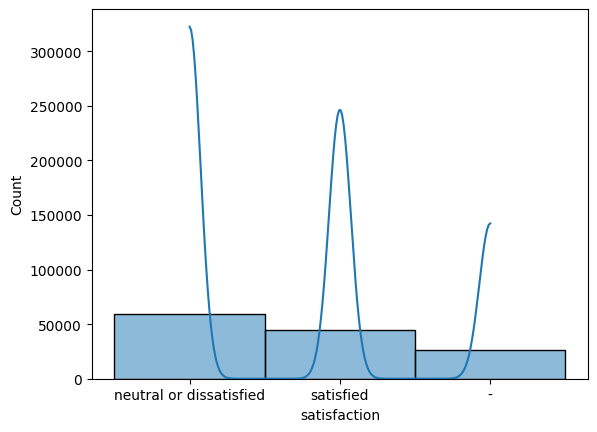

In [9]:
print(df['satisfaction'].value_counts(dropna=False))
sns.histplot(df['satisfaction'], kde=True)
plt.show()

Придется выбросить пропуски, хотя это и большой процент, однако они нам никак не помогут

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64


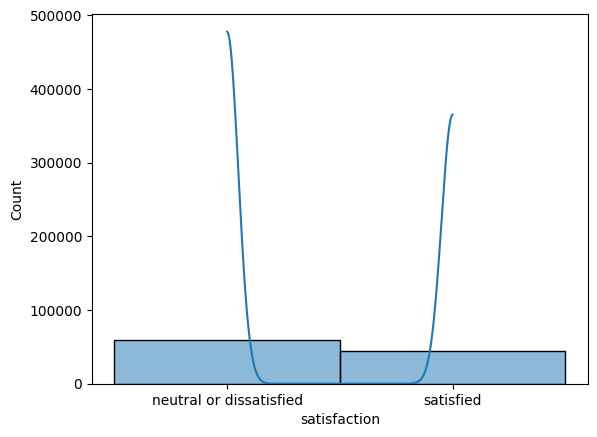

In [10]:
df = df[df['satisfaction'] != '-']
print(df['satisfaction'].value_counts(dropna=False))
sns.histplot(df['satisfaction'], kde=True)
plt.show()

Что немаловажно, не наблюдается очень большой дисбаланс классов, что хорошо

##Численные параметры
Age

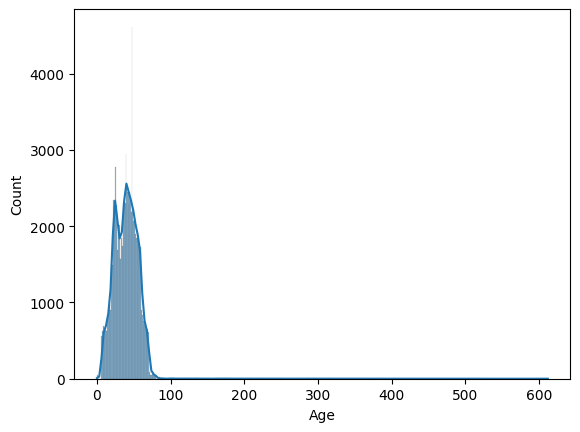

In [11]:
sns.histplot(df['Age'], kde=True)
plt.show()

In [15]:
print(f"Выбросов: {df[df['Age']>100].shape[0]}, это {df[df['Age']>100].shape[0]/ df.shape[0] * 100}%")

Выбросов: 318, это 0.3060517400677548%


Имеется 318 записей с возрастом более 100 лет, что довольно странно. Не совсем понятно, что случилось со всеми этими записями. Однако, они составляют 0.3% от всех объектов, поэтому я считаю допустимым удалить эти записи.

In [16]:
df = df[df['Age'] <= 100]

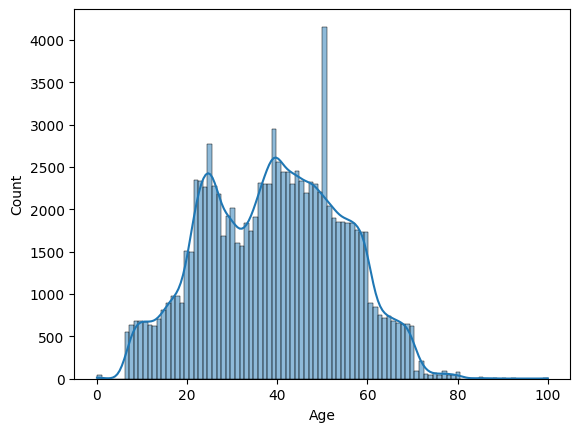

In [17]:
sns.histplot(df['Age'], kde=True)
plt.show()

In [18]:
df[df['Age'] == 0]

,id,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
4792,4793,Female,0.0,Loyal Customer,Personal Travel,Eco,438.0,1.0,2.0,3.0,...,3.0,1.0,4.0,5.0,3.0,4.0,5.0,5.0,4.0,neutral or dissatisfied
5077,5078,Male,0.0,Loyal Customer,Business travel,Eco,235.0,50.0,65.0,2.0,...,2.0,2.0,2.0,1.0,3.0,2.0,1.0,2.0,2.0,neutral or dissatisfied
5577,5578,Female,0.0,Loyal Customer,Personal Travel,Eco,501.0,8.0,66.0,4.0,...,4.0,4.0,3.0,3.0,2.0,2.0,3.0,3.0,5.0,neutral or dissatisfied
7847,7848,Female,0.0,Loyal Customer,Business travel,Business,1005.0,8.0,5.0,3.0,...,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,satisfied
7957,7958,Female,0.0,disloyal Customer,Business travel,Eco,594.0,0.0,0.0,2.0,...,2.0,3.0,3.0,2.0,5.0,4.0,2.0,3.0,3.0,neutral or dissatisfied
9190,9191,Male,0.0,Loyal Customer,Personal Travel,Eco,363.0,0.0,0.0,1.0,...,1.0,2.0,2.0,5.0,3.0,4.0,3.0,4.0,2.0,neutral or dissatisfied
12963,12964,Female,0.0,Loyal Customer,Business travel,Eco Plus,163.0,12.0,32.0,4.0,...,4.0,4.0,4.0,4.0,3.0,5.0,5.0,1.0,4.0,satisfied
14292,14293,Male,0.0,disloyal Customer,Business travel,Eco,429.0,0.0,0.0,3.0,...,2.0,1.0,1.0,1.0,1.0,2.0,4.0,1.0,1.0,neutral or dissatisfied
14621,14622,Female,0.0,Loyal Customer,Personal Travel,Eco,450.0,85.0,93.0,3.0,...,3.0,2.0,2.0,3.0,4.0,4.0,4.0,4.0,2.0,neutral or dissatisfied
19643,19644,Female,0.0,Loyal Customer,Business travel,Eco Plus,531.0,37.0,30.0,1.0,...,3.0,3.0,1.0,1.0,1.0,1.0,4.0,1.0,4.0,neutral or dissatisfied


также имеется 46 объектов, в которых возраст равен 0 (при том что там в том числе есть лояльные клиенты, что вряд ли правдоподобно для новорожденных детей). Вероятно, там данные были просто пропущены. Можно заполнить их средними, как и NaN

7.0


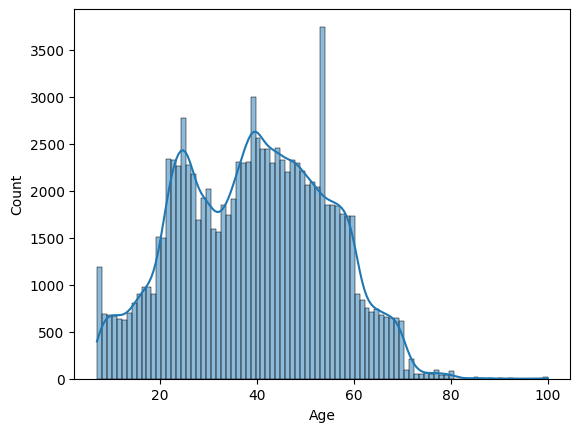

In [19]:
df['Age'] = np.where(df['Age'] == 0, df['Age'].mean(), df['Age'])

print(df['Age'].min())
sns.histplot(df['Age'], kde=True)
plt.show()

Flight Distance

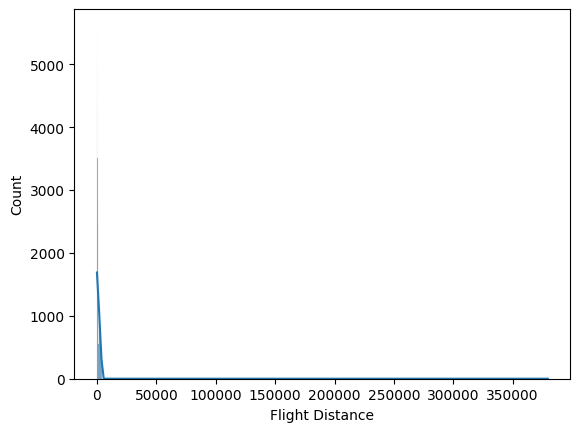

In [20]:
sns.histplot(df['Flight Distance'], kde=True)
plt.show()

Явно что-то не то. Гугл сообщает, что самый длинный маршрут самолетов из Сингапура в Нью-Йорк составляет 15 288 километров, или примерно 9500 миль. Посмотрим, сколько объектов превышают эту дальность и, если их не слишком много, также их выбросим.

In [22]:
print(f"Выбросов: {df[df['Flight Distance']>9500].shape[0]}, это {df[df['Flight Distance']>9500].shape[0]/ df.shape[0] * 100}%")

Выбросов: 174, это 0.16840067747398985%


Это примерно 0.2%. Избавляемся с чистой совестью

In [23]:
df = df[df['Flight Distance'] <= 9500]

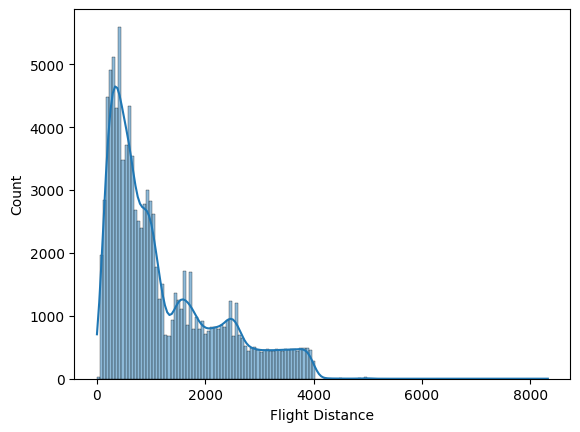

In [24]:
sns.histplot(df['Flight Distance'], kde=True)
plt.show()

In [25]:
df[df['Flight Distance'] == 0]

,id,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
44064,44065,Male,29.0,Loyal Customer,Personal Travel,Eco,0.0,0.0,0.0,2.0,...,2.0,3.0,3.0,2.0,2.0,4.0,4.0,4.0,3.0,neutral or dissatisfied
73656,73657,Male,60.0,Loyal Customer,Business travel,Business,0.0,0.0,0.0,0.0,...,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,satisfied
85305,85306,Male,50.0,Loyal Customer,Personal Travel,Eco,0.0,0.0,0.0,3.0,...,3.0,1.0,1.0,3.0,3.0,3.0,3.0,2.0,1.0,neutral or dissatisfied
109779,109780,Female,61.0,Loyal Customer,Personal Travel,Business,0.0,0.0,0.0,3.0,...,4.0,4.0,5.0,5.0,3.0,5.0,4.0,5.0,3.0,neutral or dissatisfied


Также выбросим объекты с нулевой длиной полета

In [26]:
df = df[df['Flight Distance'] > 0]
print(df['Flight Distance'].min())

31.0


Теперь это больше похоже на правду. Кстати, самый короткий рейс составляет 1.7 миль и соединяет два шотландских острова. Так что минимальная длина 31 миля - это нормально.

Departure Delay in Minutes

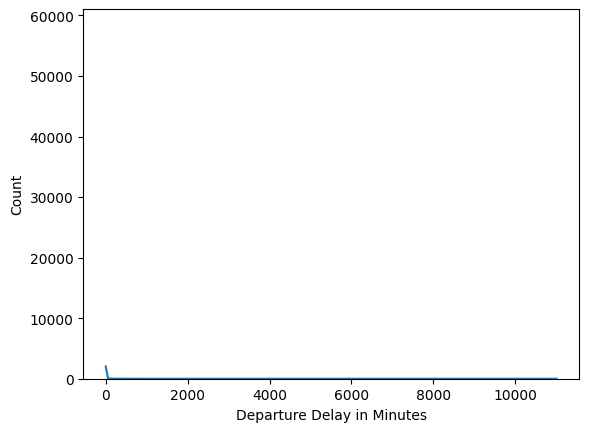

In [27]:
sns.histplot(df['Departure Delay in Minutes'], kde=True)
plt.show()

Совсем нехорошо выглядит. Среднее значение - 15 минут, медиана - 0, а 75% квантиль - 12 минут. Также отметим, что задержка на сутки - это примерно 1500 минут. То есть значение 20000 минут - это около двух недель, что точно не может быть правдой (или???). Посмотрим, сколько задержек дольше суток.

In [28]:
df[df['Departure Delay in Minutes']>1500].shape

(24, 24)

Совсем немного. Можем взять и более адекватное значение в 4 часа

In [29]:
print(f"Выбросов: {df[df['Departure Delay in Minutes']>240].shape[0]}, это {df[df['Departure Delay in Minutes']>240].shape[0]/ df.shape[0] * 100}%")

Выбросов: 528, это 0.5122483628425903%


Это пол процента, удалим эти объекты

In [30]:
df = df[df['Departure Delay in Minutes'] <= 240]

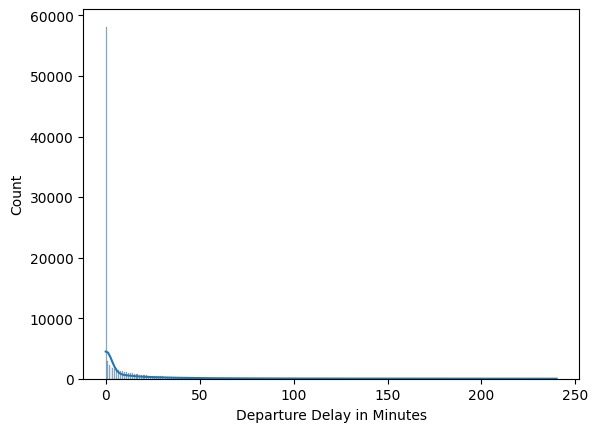

In [31]:
sns.histplot(df['Departure Delay in Minutes'], kde=True)
plt.show()

Arrival Delay in Minutes

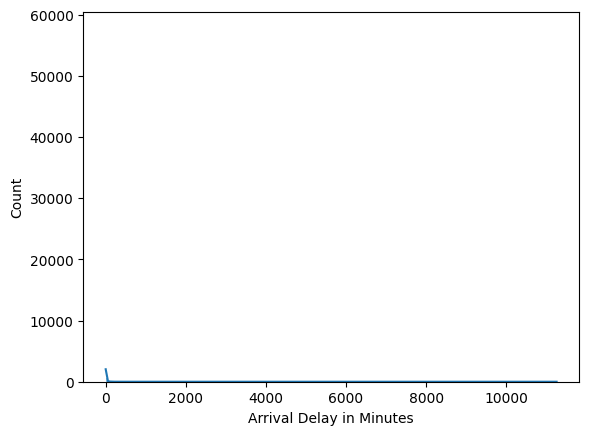

In [32]:
sns.histplot(df['Arrival Delay in Minutes'], kde=True)
plt.show()

Применим ту же логику, что и в прошлом пункте

In [33]:
print(f"Выбросов: {df[df['Arrival Delay in Minutes']>240].shape[0]}, это {df[df['Arrival Delay in Minutes']>240].shape[0]/ df.shape[0] * 100}%")

Выбросов: 109, это 0.10637986395088958%


In [34]:
df = df[df['Arrival Delay in Minutes'] <= 240]

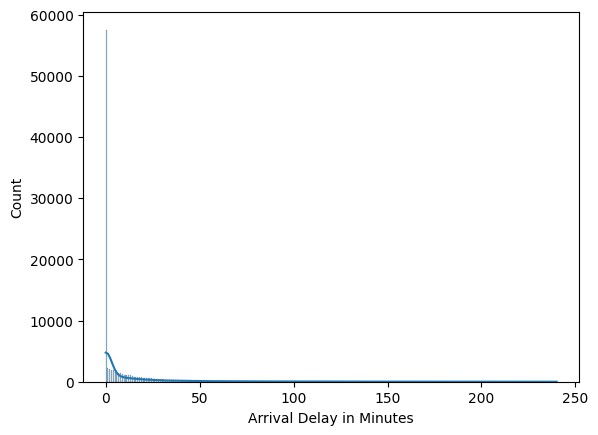

In [35]:
sns.histplot(df['Arrival Delay in Minutes'], kde=True)
plt.show()

##Порядковые параметры
Inflight wifi service

3.0     25384
2.0     25324
4.0     19382
1.0     17490
5.0     11257
0.0      3059
NaN        33
6.0         6
21.0        4
7.0         3
40.0        2
16.0        2
12.0        2
18.0        1
20.0        1
28.0        1
25.0        1
45.0        1
10.0        1
15.0        1
Name: Inflight wifi service, dtype: int64


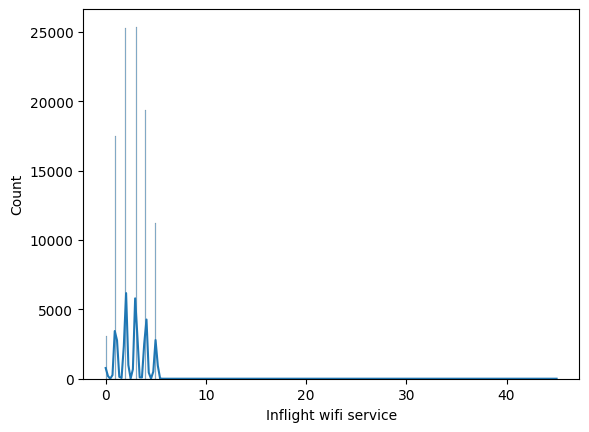

In [36]:
print(df['Inflight wifi service'].value_counts(dropna=False))
sns.histplot(df['Inflight wifi service'], kde=True)
plt.show()

In [37]:
df[df['Inflight wifi service'] > 5].shape

(26, 24)

In [38]:
df['Inflight wifi service'].isna().sum()

33

Значений больше 5 и нанов очень мало, их можно выбросить

In [39]:
df = df[df['Inflight wifi service'] <= 5]

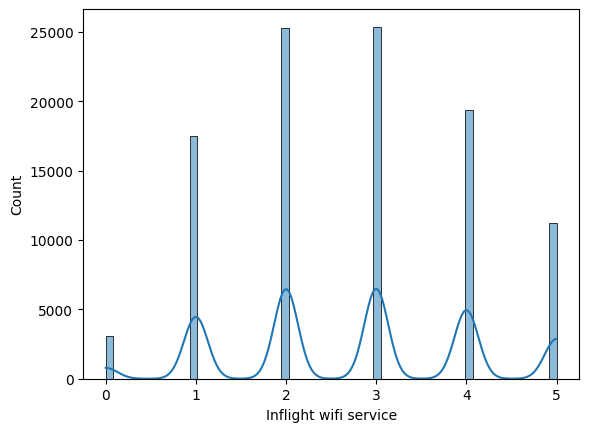

In [40]:
sns.histplot(df['Inflight wifi service'], kde=True)
plt.show()

In [41]:
print(f"Выбросов: {df[df['Inflight wifi service']< 1].shape[0]}, это {df[df['Inflight wifi service']< 1].shape[0]/ df.shape[0] * 100}%")

Выбросов: 3059, это 3.002080552720421%


Однако объектов, где стоит 0 - 3%, их не хотелось бы выбрасывать, хотя это некорректная оценка. На мой взгляд, есть два вероятных сценария возникновения такой ошибки: либо это означает очень низкую оценку, либо то, что клиент не выставил эту оценку вообще. В первом случае обосновано заменять нули единицами, а во втором - например, средней оценкой. Также вероятно, что в первом случае эта оценка соотносится с неудовлетворенностью клиента полетом, а во втором - не имеет такой связи. Попробуем это оценить, вычислив размер категорий "0 и удовлетворен", "0 и не удовлетворен" и для сравнения то же самое для оценок 1, 3(примерное среднее) и 5.

In [42]:
df['Inflight wifi service'].mean()

2.7292827981471306

In [43]:
zero = df[df['Inflight wifi service'] == 0]
one = df[df['Inflight wifi service'] == 1]
three = df[df['Inflight wifi service'] == 3]
five = df[df['Inflight wifi service'] == 5]
print(f"0 and satisfied {zero[zero['satisfaction'] == 'satisfied'].shape[0]}, 0 and dissatisfied {zero[zero['satisfaction'] == 'neutral or dissatisfied'].shape[0]}")
print(f"1 and satisfied {one[one['satisfaction'] == 'satisfied'].shape[0]}, 1 and dissatisfied {one[one['satisfaction'] == 'neutral or dissatisfied'].shape[0]}")
print(f"3 and satisfied {three[three['satisfaction'] == 'satisfied'].shape[0]}, 3 and dissatisfied {three[three['satisfaction'] == 'neutral or dissatisfied'].shape[0]}")
print(f"5 and satisfied {five[five['satisfaction'] == 'satisfied'].shape[0]}, 5 and dissatisfied {five[five['satisfaction'] == 'neutral or dissatisfied'].shape[0]}")

0 and satisfied 3049, 0 and dissatisfied 10
1 and satisfied 5690, 1 and dissatisfied 11800
3 and satisfied 6356, 3 and dissatisfied 19028
5 and satisfied 11153, 5 and dissatisfied 104


<Axes: xlabel='Inflight wifi service', ylabel='count'>

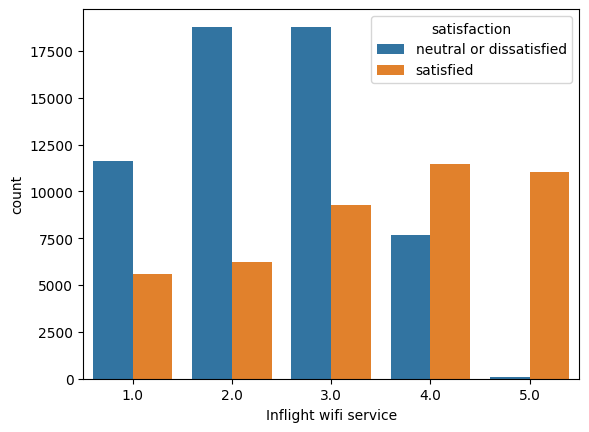

In [102]:
sns.countplot(x='Inflight wifi service', data = df, hue='satisfaction')

Больше похоже на 3, чем на 1. Заменим так.

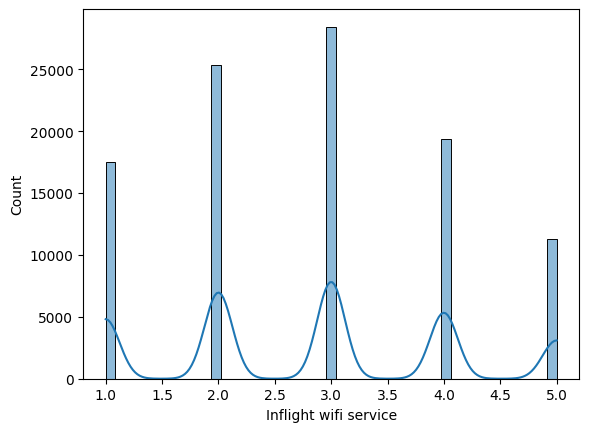

In [44]:
df['Inflight wifi service'] = np.where(df['Inflight wifi service'] == 0, 3, df['Inflight wifi service'])

sns.histplot(df['Inflight wifi service'], kde=True)
plt.show()

Departure/Arrival time convenient

4.0     25018
5.0     21973
3.0     17624
2.0     16819
1.0     15169
0.0      5220
NaN        41
30.0        4
8.0         4
12.0        4
9.0         4
6.0         3
20.0        2
16.0        2
14.0        2
45.0        1
24.0        1
27.0        1
35.0        1
32.0        1
7.0         1
10.0        1
Name: Departure/Arrival time convenient, dtype: int64


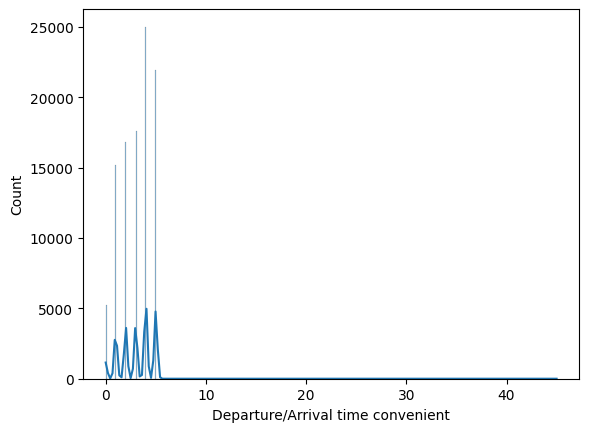

In [45]:
print(df['Departure/Arrival time convenient'].value_counts(dropna=False))
sns.histplot(df['Departure/Arrival time convenient'], kde=True)
plt.show()

Проделаем то же самое

In [46]:
df = df[df['Departure/Arrival time convenient'] <= 5]

In [47]:
df['Departure/Arrival time convenient'].isna().sum()

0

In [48]:
df['Departure/Arrival time convenient'].mean()

3.060369464659262

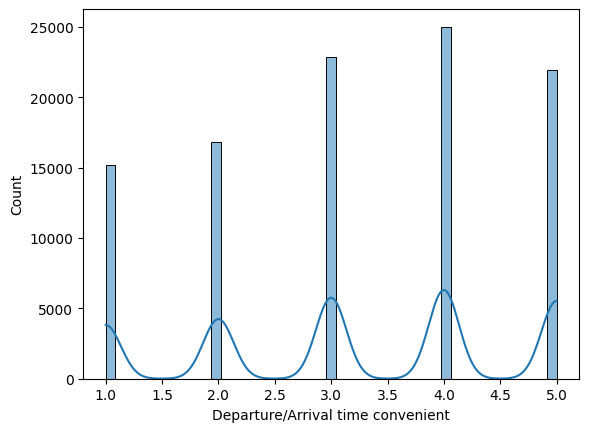

In [49]:
df['Departure/Arrival time convenient'] = np.where(df['Departure/Arrival time convenient'] == 0, 3, df['Departure/Arrival time convenient'])

sns.histplot(df['Departure/Arrival time convenient'], kde=True)
plt.show()

Ease of Online booking

3.0     23978
2.0     23510
4.0     19139
1.0     17159
5.0     13574
0.0      4407
NaN        33
8.0         3
18.0        3
12.0        3
10.0        2
24.0        2
16.0        2
45.0        1
9.0         1
21.0        1
36.0        1
28.0        1
14.0        1
15.0        1
20.0        1
Name: Ease of Online booking, dtype: int64


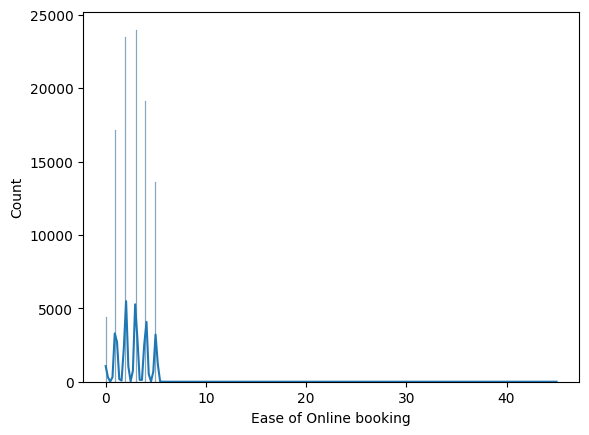

In [50]:
print(df['Ease of Online booking'].value_counts(dropna=False))
sns.histplot(df['Ease of Online booking'], kde=True)
plt.show()

In [51]:
df = df[df['Ease of Online booking'] <= 5]
df['Ease of Online booking'].isna().sum()

0

In [52]:
df['Ease of Online booking'].mean()

2.7566794736997258

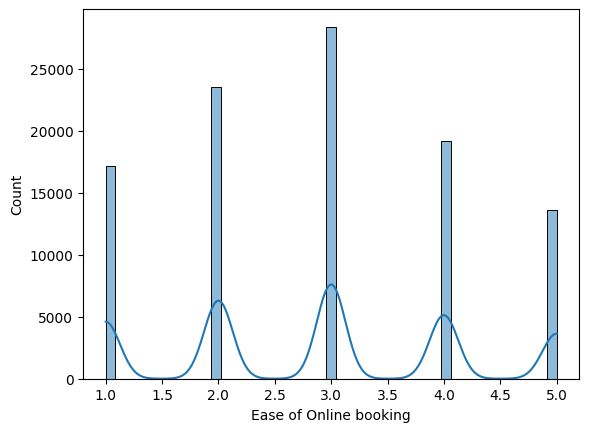

In [53]:
df['Ease of Online booking'] = np.where(df['Ease of Online booking'] == 0, 3, df['Ease of Online booking'])

sns.histplot(df['Ease of Online booking'], kde=True)
plt.show()

Gate location

3.0     27986
4.0     23898
2.0     19032
1.0     17192
5.0     13598
NaN        29
8.0         6
6.0         4
12.0        3
32.0        3
9.0         3
15.0        3
28.0        2
27.0        2
0.0         1
10.0        1
14.0        1
21.0        1
30.0        1
36.0        1
Name: Gate location, dtype: int64


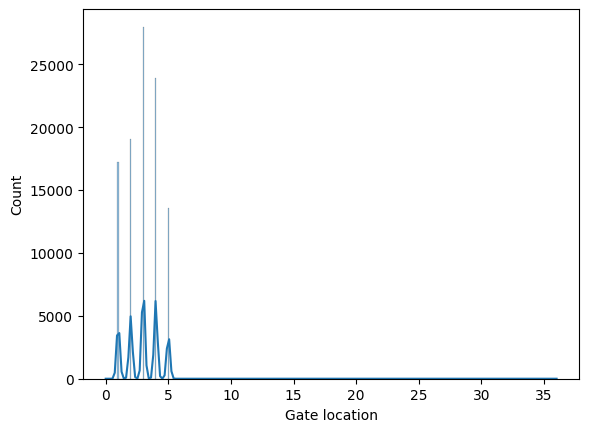

In [54]:
print(df['Gate location'].value_counts(dropna=False))
sns.histplot(df['Gate location'], kde=True)
plt.show()

Здесь 0 только один - просто удалим его

In [55]:
df = df[df['Gate location'] <= 5]
df = df[df['Gate location'] >= 1]
df['Gate location'].isna().sum()

0

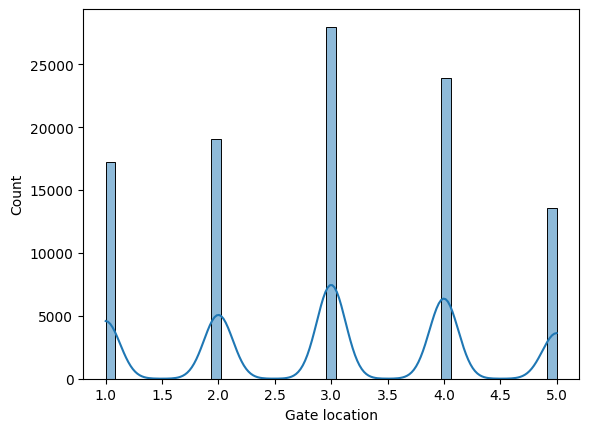

In [56]:
sns.histplot(df['Gate location'], kde=True)
plt.show()

Food and drink

4.0     23835
5.0     21838
3.0     21827
2.0     21489
1.0     12573
0.0        93
NaN        32
9.0         3
8.0         3
16.0        2
35.0        1
12.0        1
7.0         1
36.0        1
45.0        1
24.0        1
27.0        1
18.0        1
32.0        1
10.0        1
6.0         1
Name: Food and drink, dtype: int64


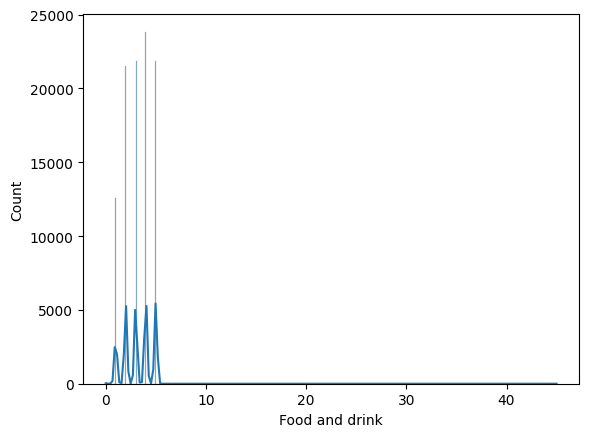

In [57]:
print(df['Food and drink'].value_counts(dropna=False))
sns.histplot(df['Food and drink'], kde=True)
plt.show()

In [58]:
df = df[df['Food and drink'] <= 5]
df['Food and drink'].isna().sum()

0

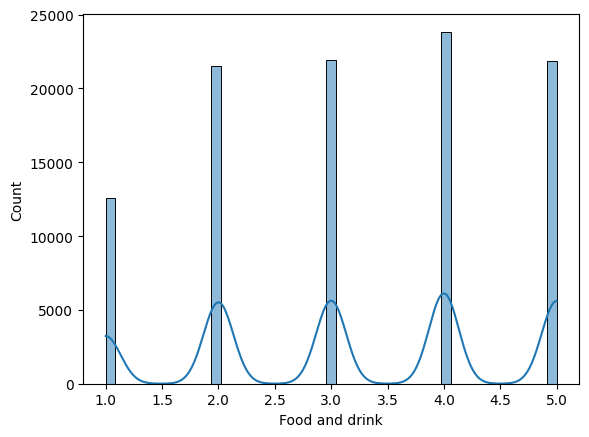

In [59]:
df['Food and drink'] = np.where(df['Food and drink'] == 0, df['Food and drink'].mean().round(), df['Food and drink'])

sns.histplot(df['Food and drink'], kde=True)
plt.show()

Online boarding

4.0     30029
3.0     21359
5.0     20216
2.0     17144
1.0     10445
0.0      2396
NaN        36
20.0        5
24.0        4
27.0        2
15.0        2
30.0        2
10.0        2
6.0         2
28.0        2
8.0         2
12.0        2
16.0        2
32.0        1
21.0        1
40.0        1
Name: Online boarding, dtype: int64


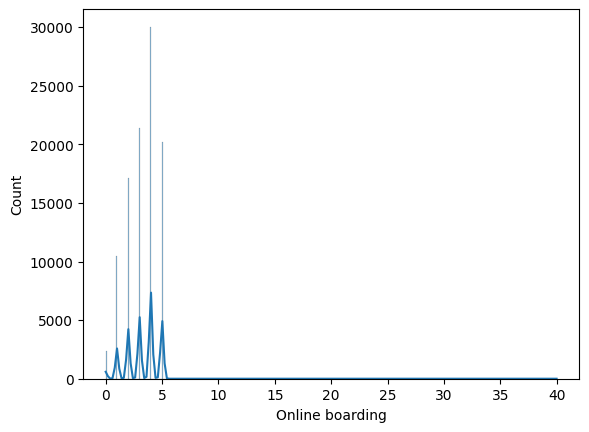

In [60]:
print(df['Online boarding'].value_counts(dropna=False))
sns.histplot(df['Online boarding'], kde=True)
plt.show()

In [61]:
df = df[df['Online boarding'] <= 5]
df['Online boarding'].isna().sum()

0

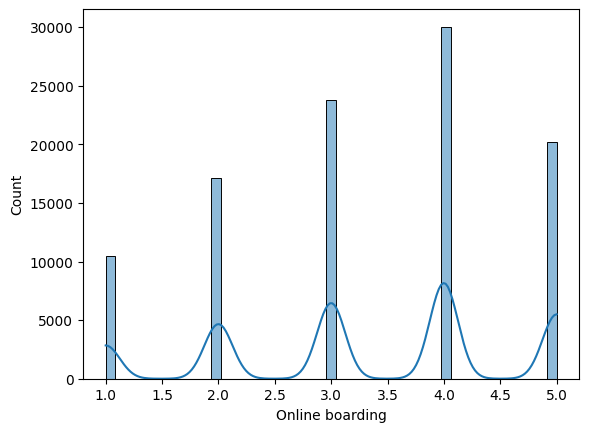

In [62]:
df['Online boarding'] = np.where(df['Online boarding'] == 0, df['Online boarding'].mean().round(), df['Online boarding'])

sns.histplot(df['Online boarding'], kde=True)
plt.show()

Seat comfort

4.0     31055
5.0     25837
3.0     18249
2.0     14572
1.0     11803
NaN        40
0.0         4
16.0        3
24.0        3
8.0         3
6.0         3
36.0        2
20.0        2
14.0        2
12.0        2
10.0        2
15.0        2
18.0        1
27.0        1
9.0         1
30.0        1
45.0        1
Name: Seat comfort, dtype: int64


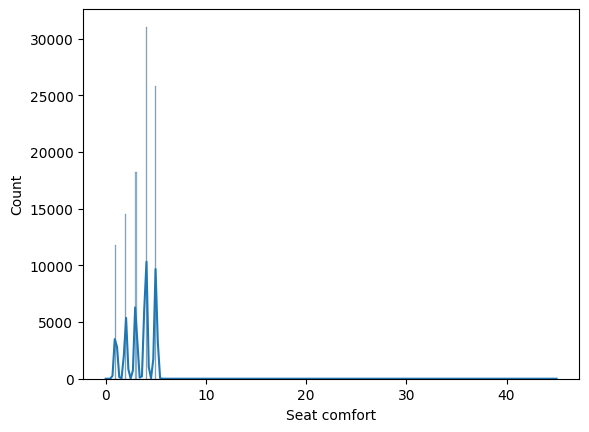

In [63]:
print(df['Seat comfort'].value_counts(dropna=False))
sns.histplot(df['Seat comfort'], kde=True)
plt.show()

In [64]:
df = df[df['Seat comfort'] <= 5]
df = df[df['Seat comfort'] >= 1]
df['Seat comfort'].isna().sum()

0

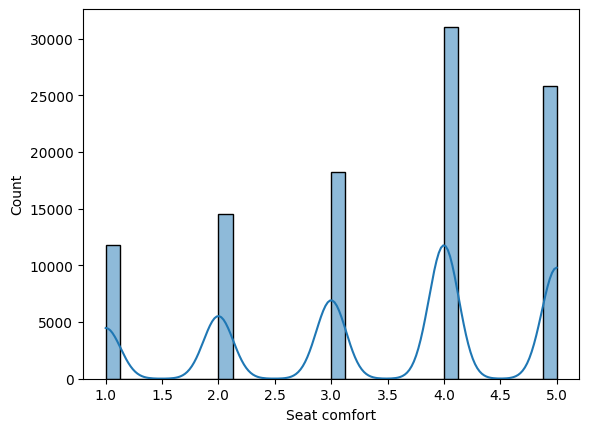

In [65]:
sns.histplot(df['Seat comfort'], kde=True)
plt.show()

Inflight entertainment

4.0     28745
5.0     24648
3.0     18634
2.0     17222
1.0     12190
NaN        41
0.0        17
20.0        3
6.0         2
40.0        2
12.0        2
16.0        2
8.0         2
9.0         1
7.0         1
18.0        1
25.0        1
35.0        1
32.0        1
Name: Inflight entertainment, dtype: int64


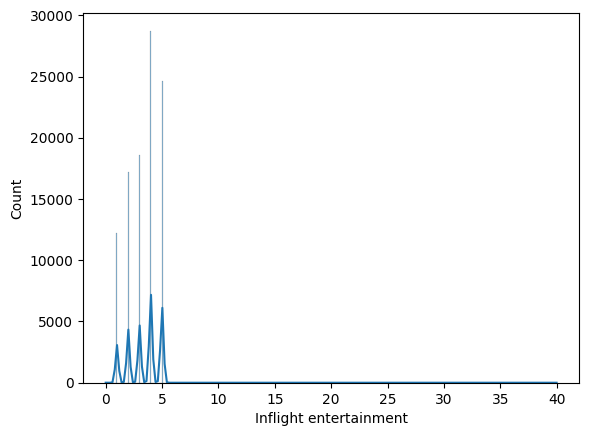

In [66]:
print(df['Inflight entertainment'].value_counts(dropna=False))
sns.histplot(df['Inflight entertainment'], kde=True)
plt.show()

In [67]:
df = df[df['Inflight entertainment'] <= 5]
df = df[df['Inflight entertainment'] >= 1]
df['Inflight entertainment'].isna().sum()

0

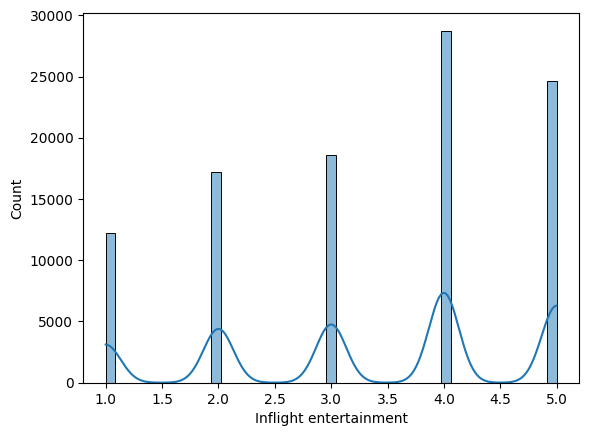

In [68]:
sns.histplot(df['Inflight entertainment'], kde=True)
plt.show()

On-board service

4.0     30178
5.0     23059
3.0     22305
2.0     14263
1.0     11576
NaN        31
0.0         4
36.0        3
10.0        3
12.0        3
16.0        2
32.0        2
20.0        2
45.0        2
8.0         1
24.0        1
40.0        1
6.0         1
28.0        1
30.0        1
Name: On-board service, dtype: int64


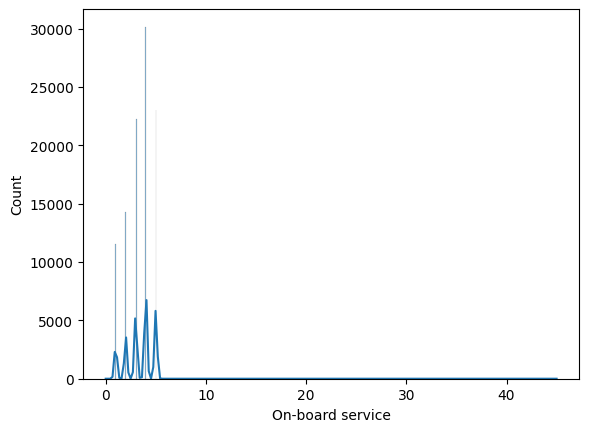

In [69]:
print(df['On-board service'].value_counts(dropna=False))
sns.histplot(df['On-board service'], kde=True)
plt.show()

In [70]:
df = df[df['On-board service'] <= 5]
df = df[df['On-board service'] >= 1]
df['On-board service'].isna().sum()

0

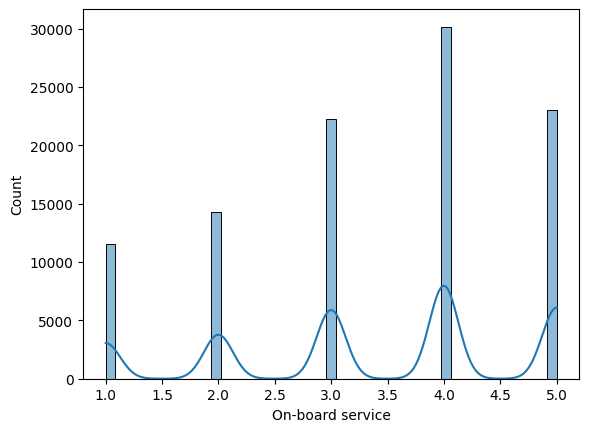

In [71]:
sns.histplot(df['On-board service'], kde=True)
plt.show()

Leg room service

4.0     28000
5.0     24058
3.0     19615
2.0     19076
1.0     10098
0.0       463
NaN        35
15.0        5
32.0        3
10.0        3
30.0        3
25.0        3
14.0        2
20.0        2
16.0        2
35.0        2
6.0         2
18.0        2
8.0         1
40.0        1
21.0        1
9.0         1
24.0        1
36.0        1
27.0        1
Name: Leg room service, dtype: int64


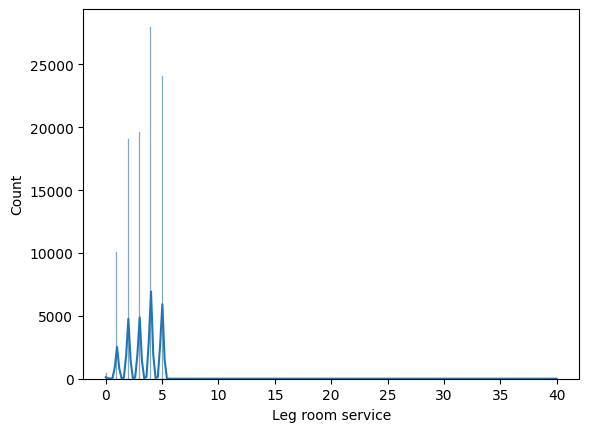

In [72]:
print(df['Leg room service'].value_counts(dropna=False))
sns.histplot(df['Leg room service'], kde=True)
plt.show()

In [73]:
df = df[df['Leg room service'] <= 5]
df['Leg room service'].isna().sum()

0

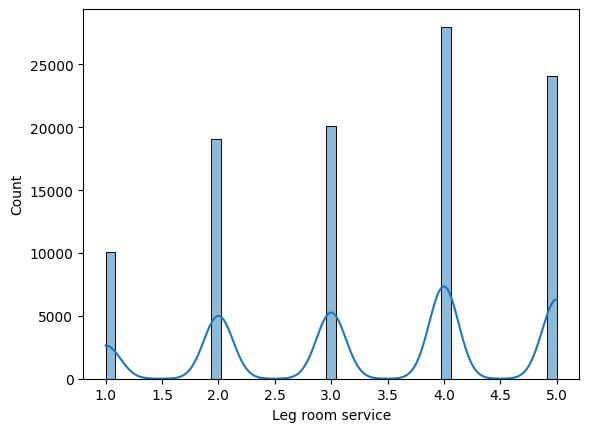

In [74]:
df['Leg room service'] = np.where(df['Leg room service'] == 0, df['Leg room service'].mean().round(), df['Leg room service'])

sns.histplot(df['Leg room service'], kde=True)
plt.show()

Baggage handling

4.0     36466
5.0     26415
3.0     20093
2.0     11217
1.0      7064
NaN        31
0.0         4
32.0        2
20.0        2
40.0        2
27.0        2
28.0        2
9.0         1
16.0        1
14.0        1
8.0         1
36.0        1
25.0        1
10.0        1
18.0        1
30.0        1
15.0        1
Name: Baggage handling, dtype: int64


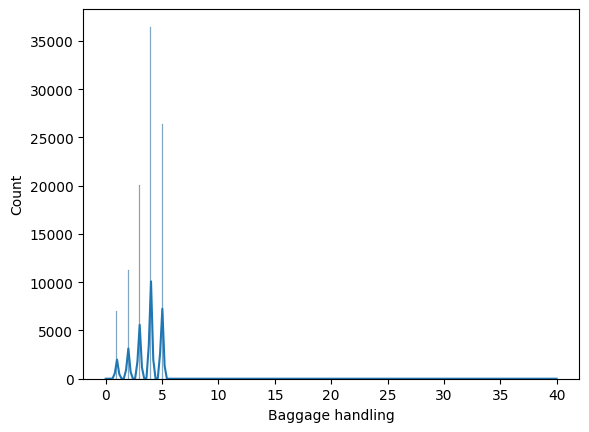

In [75]:
print(df['Baggage handling'].value_counts(dropna=False))
sns.histplot(df['Baggage handling'], kde=True)
plt.show()

In [76]:
df = df[df['Baggage handling'] <= 5]
df = df[df['Baggage handling'] >= 1]
df['Baggage handling'].isna().sum()

0

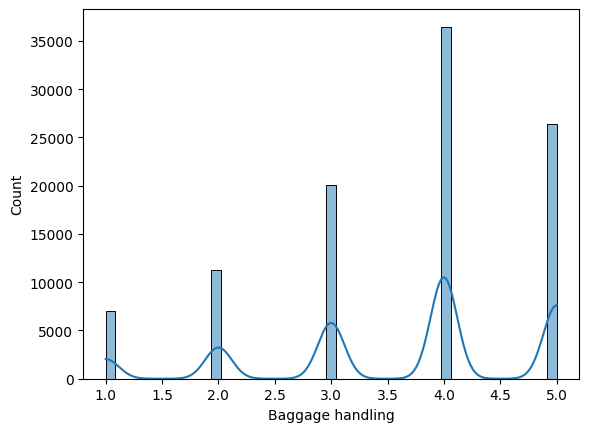

In [77]:
sns.histplot(df['Baggage handling'], kde=True)
plt.show()

Checkin service

4.0     28281
3.0     27728
5.0     20064
1.0     12564
2.0     12549
NaN        34
8.0         5
0.0         4
6.0         4
15.0        3
28.0        3
20.0        2
9.0         2
7.0         2
45.0        2
14.0        1
36.0        1
16.0        1
21.0        1
24.0        1
12.0        1
10.0        1
35.0        1
Name: Checkin service, dtype: int64


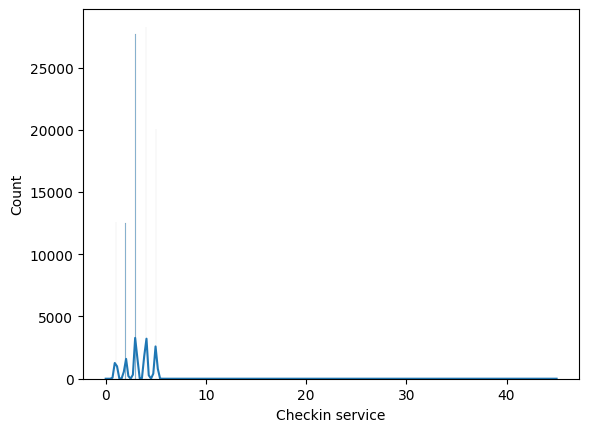

In [78]:
print(df['Checkin service'].value_counts(dropna=False))
sns.histplot(df['Checkin service'], kde=True)
plt.show()

In [79]:
df = df[df['Checkin service'] <= 5]
df = df[df['Checkin service'] >= 1]
df['Checkin service'].isna().sum()

0

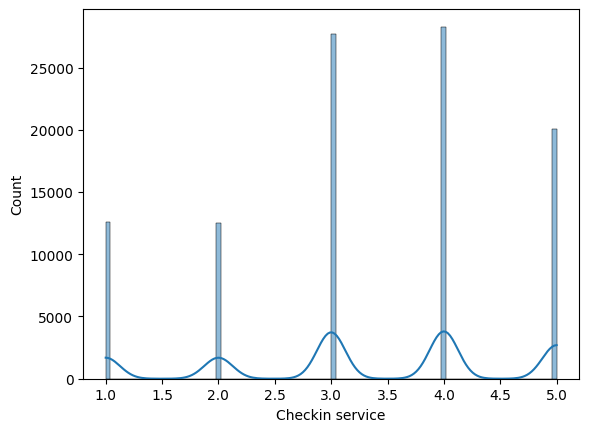

In [80]:
sns.histplot(df['Checkin service'], kde=True)
plt.show()

Inflight service

4.0     37017
5.0     26435
3.0     19690
2.0     11117
1.0      6847
NaN        46
12.0        5
15.0        3
16.0        3
8.0         3
28.0        3
9.0         2
14.0        2
35.0        2
25.0        2
10.0        2
36.0        1
30.0        1
6.0         1
24.0        1
21.0        1
20.0        1
0.0         1
Name: Inflight service, dtype: int64


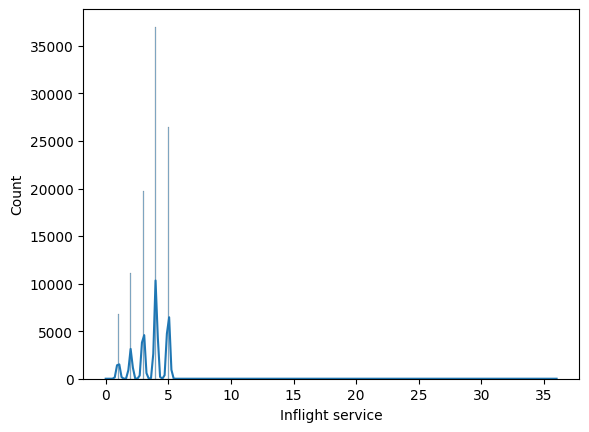

In [81]:
print(df['Inflight service'].value_counts(dropna=False))
sns.histplot(df['Inflight service'], kde=True)
plt.show()

In [82]:
df = df[df['Inflight service'] <= 5]
df = df[df['Inflight service'] >= 1]
df['Inflight service'].isna().sum()

0

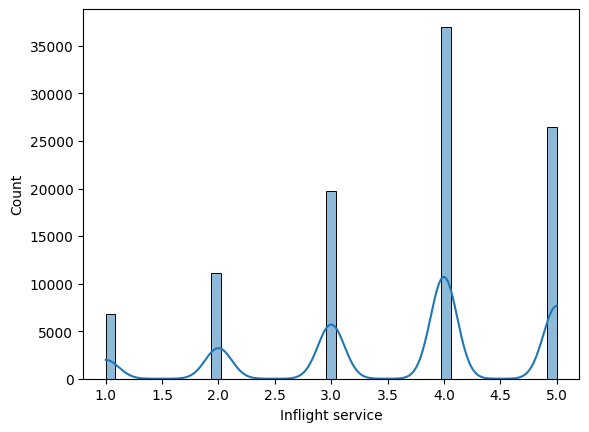

In [83]:
sns.histplot(df['Inflight service'], kde=True)
plt.show()

Cleanliness

4.0     26417
3.0     23926
5.0     22035
2.0     15693
1.0     12979
NaN        31
0.0         6
16.0        2
30.0        2
15.0        2
32.0        2
9.0         2
6.0         1
12.0        1
21.0        1
18.0        1
28.0        1
45.0        1
7.0         1
40.0        1
10.0        1
Name: Cleanliness, dtype: int64


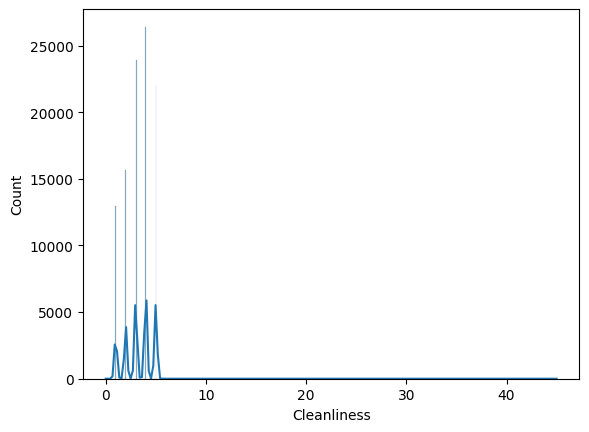

In [84]:
print(df['Cleanliness'].value_counts(dropna=False))
sns.histplot(df['Cleanliness'], kde=True)
plt.show()

In [85]:
df = df[df['Cleanliness'] <= 5]
df = df[df['Cleanliness'] >= 1]
df['Cleanliness'].isna().sum()

0

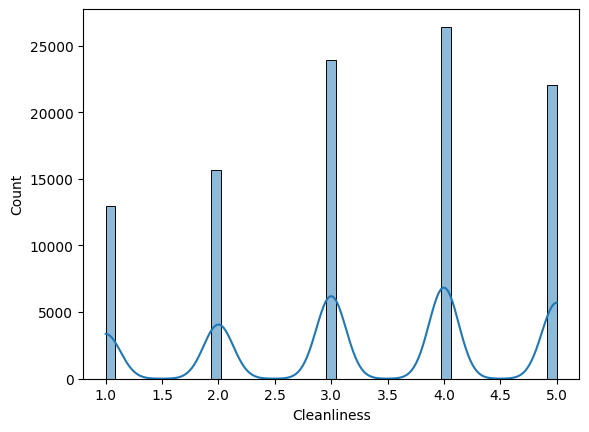

In [86]:
sns.histplot(df['Cleanliness'], kde=True)
plt.show()

##Категориальные параметры
Gender

Female    51179
Male      49623
NaN         248
Name: Gender, dtype: int64


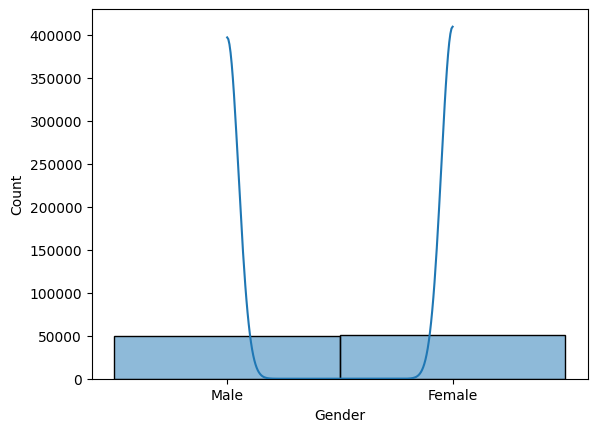

In [87]:
print(df['Gender'].value_counts(dropna=False))
sns.histplot(df['Gender'], kde=True)
plt.show()

In [88]:
248/df.shape[0]*100

0.24542305789213262

можно выбросить объекты с пропусками

In [89]:
df = df.dropna(subset=['Gender'])
print(df['Gender'].value_counts(dropna=False))

Female    51179
Male      49623
Name: Gender, dtype: int64


Customer Type

Loyal Customer       82313
disloyal Customer    18426
NaN                     63
Name: Customer Type, dtype: int64


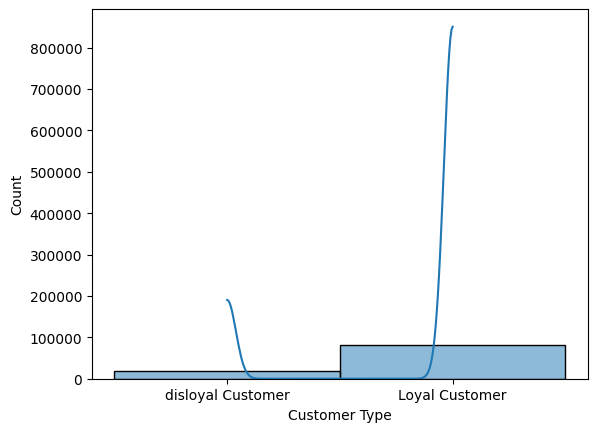

In [90]:
print(df['Customer Type'].value_counts(dropna=False))
sns.histplot(df['Customer Type'], kde=True)
plt.show()

In [91]:
63/df.shape[0]*100

0.06249875994523918

In [92]:
df = df.dropna(subset=['Customer Type'])
print(df['Customer Type'].value_counts(dropna=False))

Loyal Customer       82313
disloyal Customer    18426
Name: Customer Type, dtype: int64


Type of Travel

Business travel    69385
Personal Travel    31269
NaN                   85
Name: Type of Travel, dtype: int64


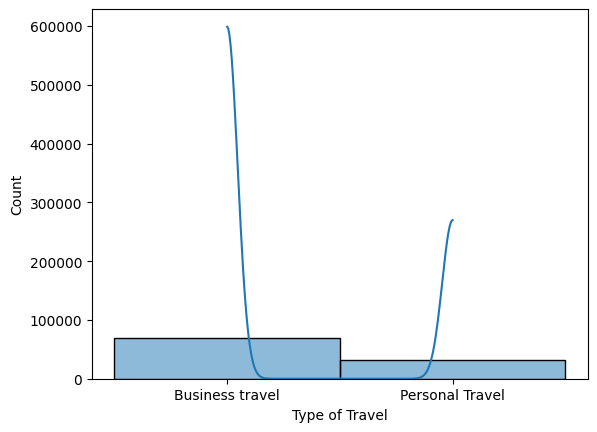

In [93]:
print(df['Type of Travel'].value_counts(dropna=False))
sns.histplot(df['Type of Travel'], kde=True)
plt.show()

In [94]:
85/df.shape[0]*100

0.0843764579755606

In [95]:
df = df.dropna(subset=['Type of Travel'])
print(df['Type of Travel'].value_counts(dropna=False))

Business travel    69385
Personal Travel    31269
Name: Type of Travel, dtype: int64


Class

Business    48022
Eco         45276
Eco Plus     7268
NaN            88
Name: Class, dtype: int64


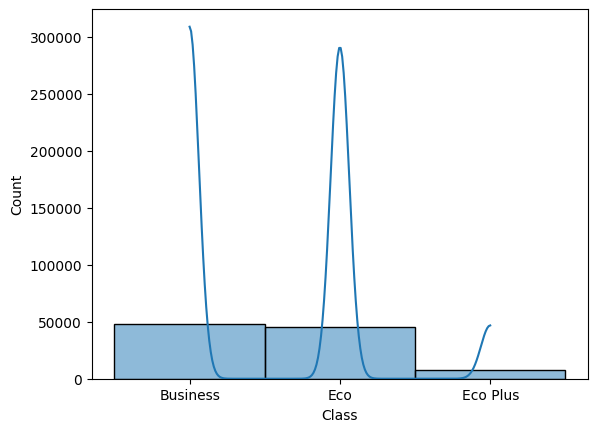

In [96]:
print(df['Class'].value_counts(dropna=False))
sns.histplot(df['Class'], kde=True)
plt.show()

In [97]:
88/df.shape[0]*100

0.0874282194448308

In [98]:
df = df.dropna(subset=['Class'])
print(df['Class'].value_counts(dropna=False))

Business    48022
Eco         45276
Eco Plus     7268
Name: Class, dtype: int64


##Промежуточный результат

In [99]:
df.describe()

,id,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,100566.000000,100566.000000,100566.000000,100566.000000,100566.000000,100566.000000,100566.000000,100566.000000,100566.000000,100566.000000,100566.000000,100566.000000,100566.000000,100566.000000,100566.000000,100566.000000,100566.000000,100566.000000,100566.000000
mean,64970.617077,39.414937,1189.259879,13.139878,13.513911,2.819492,3.214198,2.887019,2.977965,3.204960,3.320088,3.439125,3.359147,3.383291,3.363503,3.631526,3.303860,3.643617,3.285415
std,37464.450977,15.155053,999.008588,29.452907,29.879133,1.238971,1.350476,1.270575,1.277502,1.325671,1.252819,1.318909,1.332715,1.287645,1.296549,1.181167,1.265652,1.174470,1.311696
min,1.000000,7.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,32566.250000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,64913.500000,40.000000,842.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,97409.750000,51.000000,1741.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,129880.000000,100.000000,8326.000000,240.000000,240.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [100]:
df.describe(include ='object')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,100566,100566,100566,100566,100566
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,51055,82175,69320,48022,56973


##Зависимости
посмотрим на корреляции

In [103]:
df.columns

Index(['id', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'satisfaction'],
      dtype='object')

<Axes: >

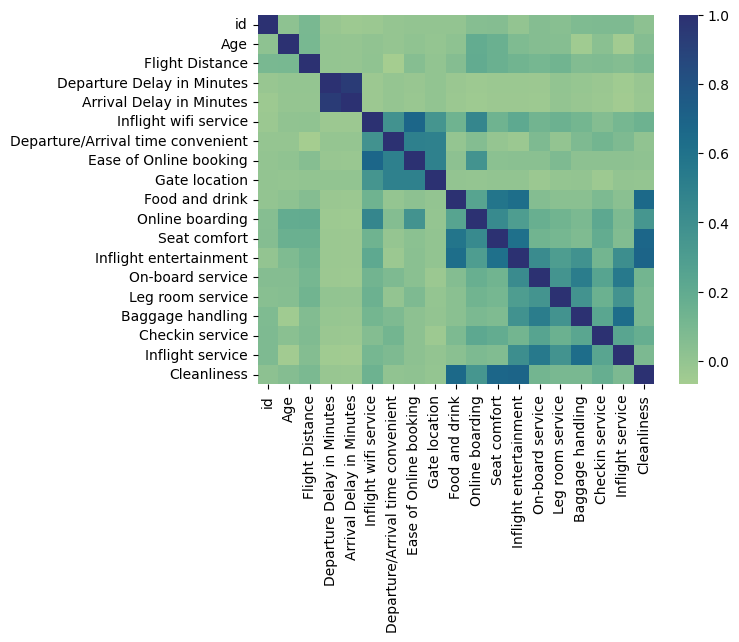

In [105]:
corr = df.corr(numeric_only='True')

sns.heatmap(corr, cmap="crest")

In [107]:
corr = df[['Departure Delay in Minutes',
       'Arrival Delay in Minutes']].corr()

In [108]:
corr

,Departure Delay in Minutes,Arrival Delay in Minutes
Departure Delay in Minutes,1.000000,0.940009
Arrival Delay in Minutes,0.940009,1.000000


Имеется довольно большая корреляция между задержкой вылета и прилета (что логично). Можно выбросить один из столбцов, например задержку прилета, чтобы оставшиеся параметры были линейно независимы

In [113]:
df = df.drop( 'Arrival Delay in Minutes', axis = 1)

##Модель
Создаем X и y, кодируем целевую переменную: 1 - клиент доволен, 0 - клиент недоволен

In [142]:
y = df['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})
X = df.drop('satisfaction', axis = 1).drop('id', axis = 1)

In [143]:
X

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,Male,48.0,disloyal Customer,Business travel,Business,821.0,2.0,3.0,3.0,3.0,...,5.0,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0
1,Female,35.0,Loyal Customer,Business travel,Business,821.0,26.0,2.0,2.0,2.0,...,3.0,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0
2,Male,41.0,Loyal Customer,Business travel,Business,853.0,0.0,4.0,4.0,4.0,...,5.0,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0
3,Male,50.0,Loyal Customer,Business travel,Business,1905.0,0.0,2.0,2.0,2.0,...,4.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0
4,Female,49.0,Loyal Customer,Business travel,Business,3470.0,0.0,3.0,3.0,3.0,...,4.0,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129873,Female,28.0,Loyal Customer,Personal Travel,Eco Plus,337.0,0.0,4.0,2.0,4.0,...,3.0,4.0,3.0,3.0,1.0,5.0,3.0,4.0,4.0,3.0
129874,Female,55.0,Loyal Customer,Personal Travel,Eco Plus,308.0,0.0,3.0,4.0,3.0,...,2.0,4.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0
129877,Male,42.0,Loyal Customer,Personal Travel,Eco Plus,337.0,6.0,2.0,5.0,2.0,...,3.0,2.0,3.0,3.0,3.0,4.0,5.0,4.0,4.0,3.0
129878,Male,50.0,Loyal Customer,Personal Travel,Eco Plus,337.0,31.0,5.0,4.0,4.0,...,3.0,4.0,4.0,3.0,4.0,5.0,5.0,3.0,4.0,3.0


In [144]:
y

0         0
1         1
2         1
3         1
4         1
         ..
129873    0
129874    0
129877    0
129878    1
129879    0
Name: satisfaction, Length: 100566, dtype: int64

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

###Обработка: кодирование и нормирование
теперь нужно закодировать категориальные переменные и нормировать численные

In [147]:
categorical = ['Gender','Customer Type', 'Type of Travel', 'Class']
numeric_features = [col for col in X_train.columns if col not in categorical]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', handle_unknown="ignore"), categorical),
    ('scaling', MinMaxScaler(), numeric_features)
])

X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

In [148]:
lst = list(column_transformer.transformers_[0][1].get_feature_names_out())
lst.extend(numeric_features)

X_train_transformed = pd.DataFrame(X_train_transformed, columns=lst)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=lst)

X_train_transformed.head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Age,Flight Distance,Departure Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,1.0,0.0,1.0,1.0,0.0,0.236559,0.050030,0.000000,0.75,1.00,...,1.00,0.75,1.00,1.0,0.50,0.25,1.00,0.75,0.75,1.00
1,1.0,0.0,0.0,0.0,0.0,0.483871,0.476552,0.004167,0.50,0.50,...,1.00,1.00,0.75,0.5,0.50,0.75,0.50,0.50,0.50,1.00
2,0.0,0.0,0.0,0.0,0.0,0.215054,0.294635,0.020833,0.75,0.75,...,1.00,1.00,1.00,1.0,0.75,0.75,1.00,0.50,0.75,1.00
3,1.0,0.0,1.0,0.0,0.0,0.483871,0.028210,0.137500,0.50,0.25,...,0.25,0.50,0.50,0.0,0.00,0.50,0.00,0.50,0.00,0.75
4,1.0,0.0,1.0,1.0,0.0,0.591398,0.085112,0.308333,0.75,0.75,...,1.00,0.75,1.00,1.0,1.00,0.50,0.75,0.75,0.75,1.00


In [149]:
X_train_transformed.describe()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Age,Flight Distance,Departure Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,75424.000000,75424.000000,75424.000000,75424.000000,75424.000000,75424.000000,75424.000000,75424.000000,75424.000000,75424.000000,...,75424.000000,75424.000000,75424.000000,75424.000000,75424.000000,75424.000000,75424.000000,75424.000000,75424.000000,75424.000000
mean,0.492045,0.182807,0.311148,0.449486,0.071953,0.348349,0.139898,0.054326,0.455611,0.554353,...,0.551800,0.580618,0.610190,0.590107,0.596717,0.590711,0.658209,0.575947,0.661384,0.571910
std,0.499940,0.386510,0.462966,0.497445,0.258412,0.162699,0.120505,0.121541,0.309513,0.337420,...,0.331264,0.313131,0.329322,0.333203,0.322095,0.324201,0.295640,0.316314,0.293795,0.327438
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.215054,0.046142,0.000000,0.250000,0.250000,...,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.500000,0.500000,0.500000,0.250000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.354839,0.097890,0.000000,0.500000,0.500000,...,0.500000,0.500000,0.750000,0.750000,0.750000,0.750000,0.750000,0.500000,0.750000,0.500000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,0.473118,0.206510,0.050000,0.750000,0.750000,...,0.750000,0.750000,1.000000,0.750000,0.750000,0.750000,1.000000,0.750000,1.000000,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Обучение

In [157]:
model = LogisticRegression()
model.fit(X_train_transformed, y_train)
pred_train = model.predict(X_train_transformed)
pred = model.predict_proba(X_test_transformed)[:,1]

In [158]:
classes = pred > 0.5

confusion_matrix(y_test, classes)

array([[12856,  1407],
       [ 1483,  9396]])

In [182]:
importances = pd.DataFrame({'weights': model.coef_[0], 'features': X_train_transformed.columns}).sort_values(by='weights')
importances

,weights,features
2,-2.919291,Type of Travel_Personal Travel
1,-2.379613,Customer Type_disloyal Customer
7,-1.484119,Departure Delay in Minutes
4,-1.094141,Class_Eco Plus
9,-1.014637,Departure/Arrival time convenient
3,-0.910985,Class_Eco
11,-0.812148,Gate location
5,-0.621390,Age
12,-0.197967,Food and drink
0,0.021353,Gender_Male


In [161]:
print(f"train:\naccuracy = {accuracy_score(y_train, pred_train)}\nrecall = {recall_score(y_train, pred_train)}\nprecision = {precision_score(y_train, pred_train)}\ntest:\naccuracy = {accuracy_score(y_test, classes)}\nrecall = {recall_score(y_test, classes)}\nprecision = {precision_score(y_test, classes)}")

train:
accuracy = 0.8861105218498091
recall = 0.8629944366326343
precision = 0.8729746444032158
test:
accuracy = 0.8850528995306658
recall = 0.863682323742991
precision = 0.8697584004443211


Неплохие результаты. Попробуем найти лучшие гиперпараметры модели с помощью GridSearch, может тогда результат будет еще лучше. Здесь не будет деления на трейн и тест, потому что гридсерч использует внутри кросс-валидацию.

In [165]:
X_transformed = column_transformer.fit_transform(X)

In [166]:
lst = list(column_transformer.transformers_[0][1].get_feature_names_out())
lst.extend(numeric_features)

X_transformed = pd.DataFrame(X_transformed, columns=lst)

X_transformed.head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Age,Flight Distance,Departure Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,1.0,1.0,0.0,0.0,0.0,0.440860,0.095238,0.008333,0.50,0.50,...,1.00,0.50,1.00,1.0,0.5,0.25,1.0,0.75,1.0,1.00
1,0.0,0.0,0.0,0.0,0.0,0.301075,0.095238,0.108333,0.25,0.25,...,0.50,1.00,0.75,1.0,1.0,1.00,1.0,0.50,1.0,1.00
2,1.0,0.0,0.0,0.0,0.0,0.365591,0.099096,0.000000,0.75,0.75,...,1.00,1.00,1.00,0.5,0.5,0.50,0.5,0.75,0.5,1.00
3,1.0,0.0,0.0,0.0,0.0,0.462366,0.225919,0.000000,0.25,0.25,...,0.75,0.75,1.00,1.0,1.0,1.00,1.0,0.50,1.0,0.75
4,0.0,0.0,0.0,0.0,0.0,0.451613,0.414587,0.000000,0.50,0.50,...,0.75,1.00,0.75,0.5,0.5,0.75,0.5,0.50,0.5,1.00


In [173]:
from sklearn.model_selection import GridSearchCV
logModel = LogisticRegression()
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [174]:
best_clf = clf.fit(X_transformed,y)
best_clf.best_estimator_

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
2160 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: 

LogisticRegression(C=0.03359818286283781, max_iter=1000, penalty='l1',
                   solver='saga')

In [176]:
print(f"Accuracy: {best_clf.score(X_transformed,y):.3f}")

Accuracy: 0.886


На самом деле, не намного лучше.

In [188]:
model_gs = clf.best_estimator_
importances_gs = pd.DataFrame({'weights_gs': model_gs.coef_[0], 'features': X_transformed.columns}).sort_values(by='features')
importances = importances.sort_values(by = 'features')
importances['weights_gs'] = importances_gs['weights_gs']
importances[['features', 'weights', 'weights_gs']]

,features,weights,weights_gs
5,Age,-0.621390,-0.427449
18,Baggage handling,0.514420,0.498043
19,Checkin service,1.334278,1.310671
3,Class_Eco,-0.910985,-0.881659
4,Class_Eco Plus,-1.094141,-1.012356
21,Cleanliness,1.044571,0.891755
1,Customer Type_disloyal Customer,-2.379613,-2.246833
7,Departure Delay in Minutes,-1.484119,-1.219909
9,Departure/Arrival time convenient,-1.014637,-0.932062
10,Ease of Online booking,0.861507,0.690188


Веса примерно совпадают

Теперь было бы интересно для моей задачи (я хочу полностью до полета только по изначально известным данным предсказывать удовлетворенность) посмотреть, как будет работать модель только на заранее известных параметрах

In [192]:
pre_flight = ['Gender_Male', 'Age', 'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel', 'Class_Eco', 'Class_Eco Plus',
       'Flight Distance', 'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Online boarding', 'Checkin service']

In [195]:
X_pre_train = X_train_transformed[pre_flight]
X_pre_test = X_test_transformed[pre_flight]

In [196]:
model_pre = LogisticRegression(C=0.03359818286283781, max_iter=1000, penalty='l1', solver='saga')
model_pre.fit(X_pre_train, y_train)
pred_pre_train = model_pre.predict(X_pre_train)
pred_pre = model_pre.predict_proba(X_pre_test)[:,1]

In [197]:
classes_pre = pred_pre > 0.5
confusion_matrix(y_test, classes_pre)

array([[12296,  1967],
       [ 1981,  8898]])

In [198]:
print(f"train:\naccuracy = {accuracy_score(y_train, pred_pre_train)}\nrecall = {recall_score(y_train, pred_pre_train)}\nprecision = {precision_score(y_train, pred_pre_train)}\ntest:\naccuracy = {accuracy_score(y_test, classes_pre)}\nrecall = {recall_score(y_test, classes_pre)}\nprecision = {precision_score(y_test, classes_pre)}")

train:
accuracy = 0.84365719134493
recall = 0.8169896680320352
precision = 0.8215603098487643
test:
accuracy = 0.8429719194972556
recall = 0.8179060575420535
precision = 0.8189599631845375


Модель с только заранее известными параметрами дает тоже приличный результат и не переобучается, так что буду использовать именно ее

In [199]:
import pickle

with open('model.pickle', 'wb') as f:
    pickle.dump(model_pre, f)

#а так модель можно загрузить из файла:
#with open('model.pickle', 'rb') as f:
 #   model = pickle.load(f)